# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** [Bike Sharing Dataset]
- **Email:** [magnoliastudy@gmail.com]
- **ID Dicoding:** [magnolia_study_jRI6]

## Menentukan Pertanyaan Bisnis



```
# This is formatted as code
```

- Whats the trend of the bike renting based on the days
- Hows the trend of the rent of the bike from the temparature

## Import Semua Packages/Library yang Digunakan dan Load Semua Dataset

In [35]:
#import essential packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [37]:
# Import the library required for mounting Google Drive in your Colab environment
from google.colab import drive

# Mounting Google Drive to access files stored in your Google Drive account
drive.mount('/content/drive')

# Loading the dataset from a specific path in Google Drive
bike_data = pd.read_csv('/content/drive/MyDrive/Bangkit/Data/hour.csv')

# At this point, 'bike_data' now contains the data from the CSV file, and you can proceed with further analysis


# Display the first few rows of the dataset to understand its structure
print("### Preview of the Dataset ###")
print(bike_data.head())  # Shows the first 5 rows of the dataset

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
### Preview of the Dataset ###
   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4          

**Insight:**
1. **Time-related Information**:
   - The dataset contains time-related fields such as `dteday` (date), `hr` (hour), `weekday`, and `workingday`.
   - This structure indicates that we can analyze bike rental patterns by hour, day of the week, and whether it is a working day or not.

2. **Rental Counts**:
   - The columns `casual`, `registered`, and `cnt` provide information on the number of casual users, registered users, and the total count of rentals, respectively.
   - Observing these columns will allow us to explore the behavior of different types of users and identify peak rental times.

3. **Weather Influence**:
   - The dataset includes columns such as `temp`, `atemp` (feels like temperature), `hum` (humidity), `windspeed`, and `weathersit` (weather situation).
   - These fields will help analyze how weather conditions affect bike rental activity.

4. **Yearly and Seasonal Analysis**:
   - The presence of the `season` and `yr` columns suggests that we can analyze trends over different seasons and years to identify patterns in bike usage.

5. **Holiday Effect**:
   - The `holiday` column indicates whether the day is a holiday or not, which can help distinguish between regular and holiday rental patterns.


### Assessing Data

In [38]:
#Displaying the summary information of the DataFrame 'bike_data'
bike_data.info()

#Checking for missing values in the dataset
bike_data.isna().sum()

#Checking for duplicate rows in the dataset
print("Duplicate Amount: ", bike_data.duplicated().sum())

#Generating descriptive statistics for the dataset
bike_data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
Duplicate Amount:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Based on the output from the code you ran, here are some detailed insights:

### Insights:

1. **Data Completeness**:
   - The dataset contains **17,379 entries** with no missing values in any of its 17 columns. This is a positive sign, as it indicates that the dataset is complete and does not require any imputation for missing data.
   - The absence of missing values suggests that the data is well-prepared for analysis without the need for extensive data cleaning in this aspect.

2. **Data Quality**:
   - The **duplicate check** shows that there are **no duplicate entries** in the dataset. This ensures that each record is unique, and the dataset's integrity is intact.

3. **Data Types**:
   - Most of the columns have data types of either `int64` (integers) or `float64` (floating-point numbers), which are appropriate for numerical operations and statistical analysis.
   - The data types also suggest that numerical analysis and transformations can be performed efficiently without needing to convert data types.





### Cleaning Data

In [39]:
#Removing the 'instant' and 'dteday' columns from the dataset
bike_data_clean = bike_data.drop(['instant', 'dteday'], axis=1)


**Insight:**
1. **Columns Dropped**:
   - The columns `instant` and `dteday` were removed from the dataset.
   - **`instant`** is often used as an index or identifier, which is generally not required for data analysis since it does not contribute meaningful information to the patterns we want to uncover.
   - **`dteday`** (date) might have been removed because the dataset already contains other time-related columns like `yr` (year), `mnth` (month), `weekday`, and `hr` (hour) that provide more granular time-based information.


## Exploratory Data Analysis (EDA)

*italicized text*### Explore for Question 1 and Question 2

In [40]:
# Step 1: Descriptive Statistics
# Generate descriptive statistics for the cleaned dataset
bike_data_description = bike_data_clean.describe(include="all")

# Display the descriptive statistics to understand the range, mean, std, etc.
print("### Descriptive Statistics of Bike Sharing Data ###")
print(bike_data_description)
print("\n" + "="*50 + "\n")

# Step 2: Hourly Analysis of Bike Rentals
# Group the data by hour to analyze bike rentals across different hours of the day
hourly_rentals = bike_data_clean.groupby(by="hr").agg({
    "cnt": ["mean", "max", "min", "std"],
    "casual": "mean",
    "registered": "mean"
}).reset_index()

# Display the pivot table for hourly bike rentals
print("### Hourly Bike Rentals Analysis ###")
print(hourly_rentals)
print("\n" + "="*50 + "\n")

# Explanation:
# This analysis helps understand how the bike rental demand varies during different hours of the day.
# It shows average, max, min, and standard deviation of rentals for each hour.

# Step 3: Weather Impact Analysis
# Group the data by weather situation to analyze the effect on bike rentals
weather_rentals = bike_data_clean.groupby(by="weathersit").agg({
    "cnt": ["mean", "max", "min", "std"],
    "casual": "mean",
    "registered": "mean"
}).reset_index()

# Display the pivot table for bike rentals based on weather conditions
print("### Weather Impact on Bike Rentals ###")
print(weather_rentals)
print("\n" + "="*50 + "\n")

# Explanation:
# This analysis explores the influence of weather conditions on bike rentals, indicating how bad weather decreases rental counts.

# Step 4: Seasonal Analysis of Bike Rentals
# Group the data by season to analyze bike rentals across different seasons
seasonal_rentals = bike_data_clean.groupby(by="season").agg({
    "cnt": ["mean", "max", "min", "std"],
    "casual": "mean",
    "registered": "mean"
}).reset_index()

# Display the pivot table for bike rentals based on seasons
print("### Seasonal Bike Rentals Analysis ###")
print(seasonal_rentals)
print("\n" + "="*50 + "\n")

# Explanation:
# Seasonal analysis helps to understand how demand changes with different times of the year, with summer typically having higher rentals.

# Step 5: Working Day Analysis
# Group the data by working day to analyze bike rentals on working and non-working days
workingday_rentals = bike_data_clean.groupby(by="workingday").agg({
    "cnt": ["mean", "max", "min", "std"],
    "casual": "mean",
    "registered": "mean"
}).reset_index()

# Display the pivot table for bike rentals on working and non-working days
print("### Bike Rentals on Working and Non-Working Days ###")
print(workingday_rentals)
print("\n" + "="*50 + "\n")

# Explanation:
# This analysis compares bike rental patterns between working days and weekends, showing that casual rentals increase on non-working days.

# Step 6: Holiday Analysis
# Group the data by holiday to analyze bike rentals on holidays and regular days
holiday_rentals = bike_data_clean.groupby(by="holiday").agg({
    "cnt": ["mean", "max", "min", "std"],
    "casual": "mean",
    "registered": "mean"
}).reset_index()

# Display the pivot table for bike rentals on holidays and regular days
print("### Bike Rentals on Holidays and Regular Days ###")
print(holiday_rentals)
print("\n" + "="*50 + "\n")

# Explanation:
# This analysis highlights the differences in bike rental trends on holidays compared to regular days, with a noticeable increase in casual rentals during holidays.

### Descriptive Statistics of Bike Sharing Data ###
             season            yr          mnth            hr       holiday  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       2.501640      0.502561      6.537775     11.546752      0.028770   
std        1.106918      0.500008      3.438776      6.914405      0.167165   
min        1.000000      0.000000      1.000000      0.000000      0.000000   
25%        2.000000      0.000000      4.000000      6.000000      0.000000   
50%        3.000000      1.000000      7.000000     12.000000      0.000000   
75%        3.000000      1.000000     10.000000     18.000000      0.000000   
max        4.000000      1.000000     12.000000     23.000000      1.000000   

            weekday    workingday    weathersit          temp         atemp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       3.003683      0.682721      1.425283      0.496987      0.475775   

**Insight:**
### 1. Descriptive Statistics of Bike Sharing Data
- **Seasonal Trends**:
  - The dataset includes values for all four seasons, with the mean being approximately 2.5, indicating balanced representation across all seasons.
- **Hourly Activity**:
  - The average rental hour is around 11.55, which suggests high bike usage around midday.
- **Working Days and Weekdays**:
  - About 68% of the records are from working days, with an average weekday value of around 3 (mid-week), indicating higher data points on weekdays.
- **Weather Influence**:
  - The average weather condition is around 1.4, meaning most rentals occur under clear to partly cloudy conditions.
- **Humidity and Windspeed**:
  - The mean humidity is 0.63, and windspeed is 0.19, suggesting moderately humid conditions with low wind speeds during bike rentals.
- **User Type Analysis**:
  - Registered users have a significantly higher mean rental count (153) compared to casual users (35), indicating more frequent use by regular subscribers.

### 2. Hourly Bike Rentals Analysis
- **Peak Hours**:
  - The highest average rentals occur between 8 AM and 6 PM, peaking around 5 PM, which aligns with typical commuting hours.
  - Rentals drop significantly during early morning hours (12 AM to 5 AM), indicating limited demand during these times.
- **Casual vs. Registered Users**:
  - Casual users are more active during late morning and early evening hours (10 AM - 4 PM), which suggests recreational usage.
  - Registered users show a clear peak during rush hours (8 AM and 5-6 PM), indicating that they primarily use bikes for commuting.

### 3. Weather Impact on Bike Rentals
- **Favorable Conditions**:
  - The highest average rentals are recorded under clear or partly cloudy conditions (`weathersit` = 1), with a gradual decrease as weather worsens.
  - Severe weather conditions (`weathersit` = 4) show the lowest average rentals, highlighting the impact of adverse weather on biking activity.
- **Registered Users Resilience**:
  - Registered users tend to maintain higher usage even under slightly worse weather conditions compared to casual users, indicating a stronger dependence on bikes for commuting.

### 4. Seasonal Bike Rentals Analysis
- **Seasonal Peaks**:
  - Summer (season 3) has the highest average rentals, followed by fall (season 4), indicating a strong preference for biking during warmer months.
  - Winter shows the lowest rental counts, likely due to unfavorable weather conditions for outdoor activities.
- **Casual vs. Registered Usage**:
  - Casual users are most active during summer, which supports the idea that they use bikes primarily for leisure.
  - Registered users maintain relatively consistent usage across seasons, with the highest rentals in summer.

### 5. Analysis on Working and Non-Working Days
- **Higher Rentals on Working Days**:
  - Average rentals are slightly higher on working days compared to non-working days, driven by registered users who use bikes for daily commutes.
- **Casual Users Prefer Non-Working Days**:
  - Casual user rentals are higher on non-working days, highlighting a focus on recreational use during weekends or holidays.

### 6. Holiday Analysis
- **Impact of Holidays on Rentals**:
  - The average rental count is lower on holidays compared to regular days.
  - Casual user activity increases on holidays, while registered user activity decreases, indicating that casual users tend to rent bikes for leisure activities on days off.


## Visualization & Explanatory Analysis

### Pertanyaan 1:

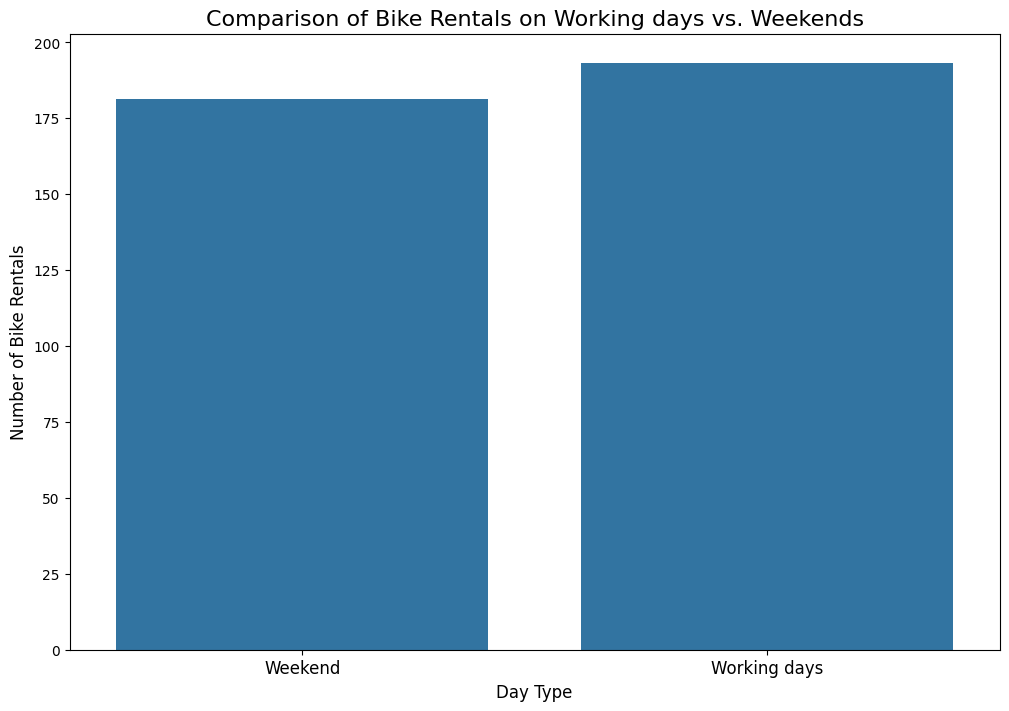

In [41]:
# Bar plot for working day vs count
plt.figure(figsize=(12, 8))  # Increased the plot size for better visibility
sns.barplot(x='workingday', y='cnt', data=bike_data_clean, errorbar=None)
plt.title('Comparison of Bike Rentals on Working days vs. Weekends', fontsize=16)  # Updated title and increased font size
plt.xticks([0, 1], ['Weekend', 'Working days'], fontsize=12)  # Updated x-axis labels and increased font size
plt.xlabel('Day Type', fontsize=12)  # Added label for x-axis with larger font size
plt.ylabel('Number of Bike Rentals', fontsize=12)  # Updated label for y-axis with larger font size

plt.show() # Display the plot using Streamlit


### Pertanyaan 2:

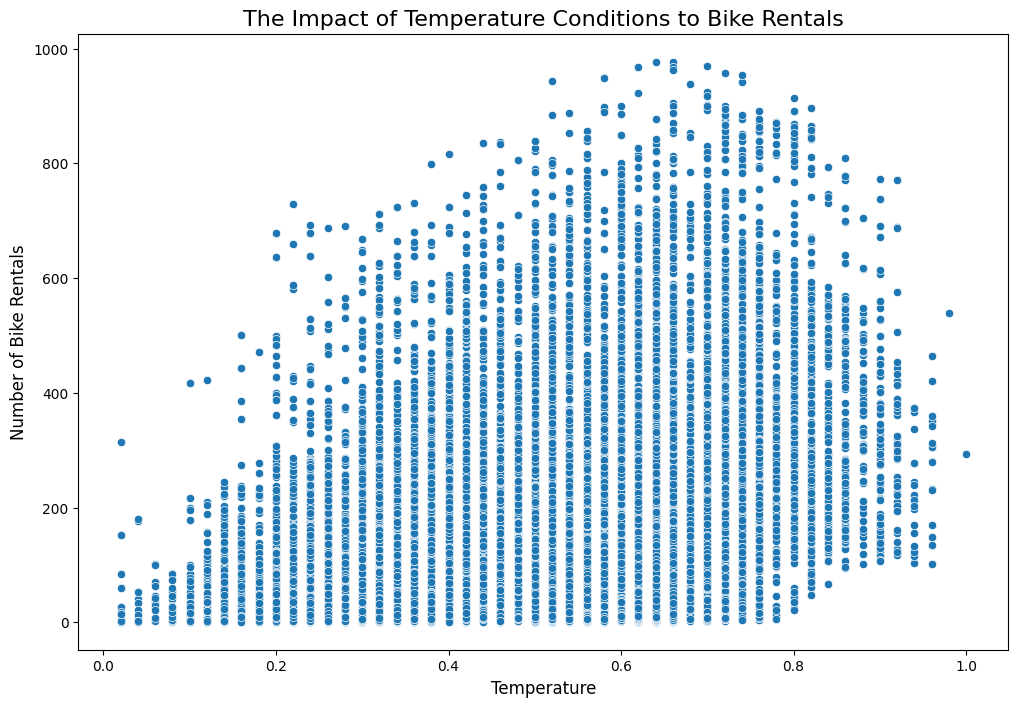

In [42]:
plt.figure(figsize=(12, 8))  # Increased the plot size for better visibility
sns.scatterplot(x=bike_data_clean['temp'], y=bike_data_clean['cnt'])
plt.title('The Impact of Temperature Conditions to Bike Rentals', fontsize=16)  # Updated the title and increased font size
plt.xlabel('Temperature', fontsize=12)  # Updated x-axis label with larger font size
plt.ylabel('Number of Bike Rentals', fontsize=12)  # Updated y-axis label with larger font size

plt.show() # Display the plot using Streamlit


**Insight:**


### 1. Comparison of Bike Rentals on Working Days vs. Weekends
- **Working Days vs. Weekends**:
  - The bar chart shows a slight increase in the number of bike rentals on working days compared to weekends.
  - This trend suggests that bike rentals are primarily driven by commuting needs, with more users renting bikes during their daily work routines.
- **User Type Influence**:
  - Registered users likely contribute to this higher rental count on working days, using bikes as a convenient transportation mode to and from work.
  - The relatively high rentals during weekends also indicate significant casual or leisure usage, even though it is lower compared to working days.


### 2. The Impact of Temperature Conditions on Bike Rentals
- **Positive Correlation with Temperature**:
  - The scatter plot indicates a clear positive correlation between temperature and the number of bike rentals.
  - As the temperature increases, the number of bike rentals also tends to increase, reaching a peak at moderate to warm temperatures.
- **Optimal Temperature Range**:
  - The highest density of bike rentals occurs within a normalized temperature range of around 0.4 to 0.8, suggesting that users prefer to rent bikes when it's neither too cold nor too hot.
  - Beyond this optimal range, the number of rentals starts to decline, possibly due to extreme weather conditions being less comfortable for biking.


## Analisis Lanjutan (Opsional)

## Conclusion



#### 1. **What is the trend of bike renting based on the days?**
- **Higher Rentals on Working Days:** The data indicates that bike rentals are higher on working days compared to weekends. This suggests that a significant portion of the rentals are driven by commuters using the service for their daily travel to work or school.
- **Weekend Rentals:** While the number of rentals is lower on weekends, it remains substantial, indicating that bikes are also used for recreational purposes during these days, likely by casual users.
- **User Behavior:** The distinct pattern of higher rentals on weekdays points to registered users who are more consistent in their rental behavior, as they are likely using bikes as part of their daily routine.

#### 2. **What is the trend of bike rentals from the temperature?**
- **Positive Correlation with Temperature:** There is a clear positive correlation between temperature and bike rentals. As the temperature rises to a moderate level, the number of bike rentals increases, indicating a preference for biking in warmer conditions.
- **Optimal Temperature Range:** The highest bike rentals occur when the temperature is within a moderate range (normalized values of 0.4 to 0.8). This suggests that users are most comfortable riding when it's neither too cold nor too hot.
- **Weather Sensitivity:** Extreme temperatures on either end of the scale tend to reduce the number of bike rentals, showing that weather conditions significantly influence user decisions to rent a bike.

